In [2]:
import fastf1 as ff1
from fastf1 import plotting

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

plotting.setup_mpl()

In [3]:
pd.options.mode.chained_assignment = None 

In [5]:
race = ff1.get_session(2019, 'Singapore', 'R')

laps = race.load_laps(with_telemetry=True)

C:\Users\Imran\anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Singapore Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['5', '16'

In [10]:
laps_vet = laps.pick_driver('VET')

# Assuming the tyres is fully warmed up after 5 laps
lap_20 = laps_vet.loc[laps_vet['LapNumber'] == 20].get_car_data().add_distance()
lap_24 = laps_vet.loc[laps_vet['LapNumber'] == 24].get_car_data().add_distance()

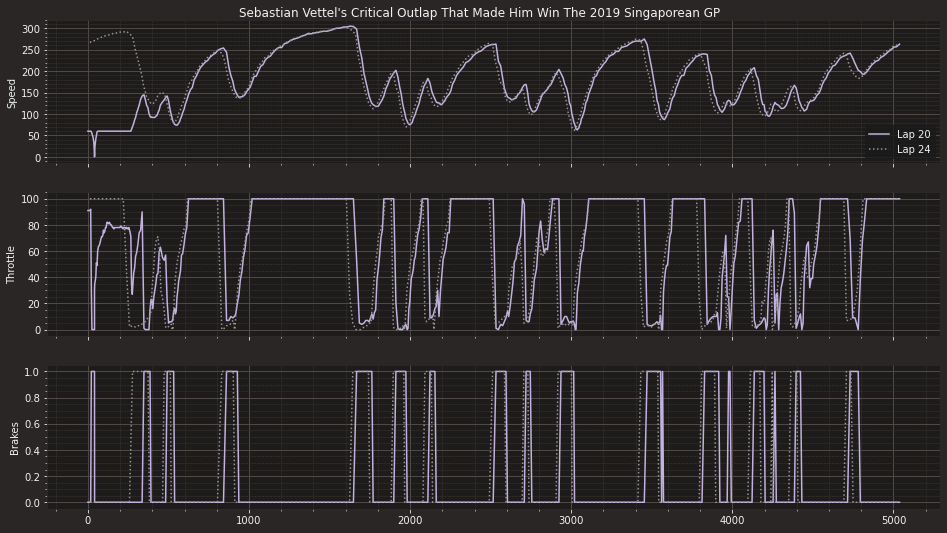

In [12]:
fig, ax = plt.subplots(3, figsize = (16, 9))
fig.suptitle("Sebastian Vettel's Critical Outlap That Made Him Win The 2019 Singaporean GP", y=0.9)

ax[0].plot(lap_20['Distance'], lap_20['Speed'], color='#C3B1E1', label='Lap 20')
ax[0].plot(lap_24['Distance'], lap_24['Speed'], color='#989898', linestyle='dotted', label='Lap 24')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(lap_20['Distance'], lap_20['Throttle'], color='#C3B1E1', label='Lap 20')
ax[1].plot(lap_24['Distance'], lap_24['Throttle'], color='#989898', linestyle='dotted', label='Lap 24')
ax[1].set(ylabel='Throttle')

ax[2].plot(lap_20['Distance'], lap_20['Brake'], color='#C3B1E1', label='Lap 20')
ax[2].plot(lap_24['Distance'], lap_24['Brake'], color='#989898', linestyle='dotted', label='Lap 24')
ax[2].set(ylabel='Brakes')

for a in ax.flat:
    a.label_outer()
    
plt.show()

In [13]:
fig.savefig('Sebastian Vettel Critical Outlap in Singapore 2019.png', dpi = 600)